In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [147]:
df = pd.read_excel('consumo_material_clean.xlsx')

In [148]:
print(df)

       CODIGO FECHAPEDIDO      NUMERO REFERENCIA  CANTIDADCOMPRA  \
0      E99808    01/01/23  1595724/23   178567.1              60   
1      B41691    01/02/16    72714/16     400403              40   
2      E64543    01/02/16    71961/16     403770              20   
3      E65007    01/02/16    72773/16      20415             100   
4      E64911    01/02/17    86159/17      20701             300   
...       ...         ...         ...        ...             ...   
15693  E64543    31/10/23  1334083/23     403770              30   
15694  E64543    31/10/23  1334092/23     403770              20   
15695  E64543    31/10/23  1335522/23     403770              10   
15696  F50071    31/10/23  1336295/23     421554               5   
15697  E65159    31/12/15   996520/15    281 421            1000   

       UNIDADESCONSUMOCONTENIDAS      PRECIO  IMPORTELINEA    TIPOCOMPRA  \
0                             10   62.590000    375.540000  Compra menor   
1                             1

In [149]:
df.isnull().sum()

CODIGO                         0
FECHAPEDIDO                    0
NUMERO                         0
REFERENCIA                     0
CANTIDADCOMPRA                 0
UNIDADESCONSUMOCONTENIDAS      0
PRECIO                         0
IMPORTELINEA                   0
TIPOCOMPRA                     0
ORIGEN                         0
TGL                          103
PRODUCTO                       0
dtype: int64

In [150]:
# Convert 'FECHAPEDIDO' to datetime
df['FECHAPEDIDO'] = pd.to_datetime(df['FECHAPEDIDO'], format='%d/%m/%y')
# Extract the year from 'FECHAPEDIDO'
df['Year'] = df['FECHAPEDIDO'].dt.year

In [151]:
# Extract the first number from 'ORIGEN'
df['FirstNumber'] = df['ORIGEN'].str.extract(r'^(\d+)-')

# Get unique values in the first number
unique_first_numbers = df['FirstNumber'].unique()

# Print the result
print(unique_first_numbers)

['1' '0']


In [152]:
# Estudiar las diferentes regiones con hospitales
# Select rows where the first number in 'ORIGEN' is 1
selected_rows_1 = df[df['ORIGEN'].str.startswith('1')]

# Print the number of results
print(selected_rows_1)

       CODIGO FECHAPEDIDO      NUMERO REFERENCIA  CANTIDADCOMPRA  \
0      E99808  2023-01-01  1595724/23   178567.1              60   
136    F43580  2020-06-01   574119/20     409729              10   
656    F43580  2021-07-02   672354/21     409729              10   
1110   F43580  2022-05-03   500213/22     409729              10   
1238   F43580  2020-08-03   830915/20     409729              10   
1490   F43325  2021-02-04   129384/21     409761              40   
1920   F42922  2021-11-04  1102970/21     409721               3   
2197   F43580  2020-06-05   589693/20     409729              10   
2371   F43580  2021-10-05   980141/21     409729              10   
2474   F43580  2019-12-05  1141431/19     409729               5   
2475   F43580  2019-12-05  1141432/19     409729               5   
2839   F43580  2021-09-06   884139/21     409729              10   
3338   E99808  2021-09-07   884965/21   178567.1              10   
3642   F43580  2020-04-08   383133/20     409729

In [153]:
# Get the number of rows in the selected subset
num_rows_selected_1 = selected_rows_1.shape[0]

# Print the result
print(f"Number of rows where the first number in 'ORIGEN' is 1: {num_rows_selected_1}")

Number of rows where the first number in 'ORIGEN' is 1: 52


In [154]:
# Select rows where the first number in 'ORIGEN' is 1
selected_rows_0 = df[df['ORIGEN'].str.startswith('0')]
num_rows_selected_0 = selected_rows_0.shape[0]
# Print the number of results
print(f"Number of rows where the first number in 'ORIGEN' is 0: {num_rows_selected_0}")

Number of rows where the first number in 'ORIGEN' is 0: 15646


In [155]:
# Group by year and calculate the sum of 'CANTIDADCOMPRA' for each year
result = df.groupby('Year')['CANTIDADCOMPRA'].sum().reset_index()

# Print the result
print(result)

   Year  CANTIDADCOMPRA
0  2015          515341
1  2016          530258
2  2017          570795
3  2018          593015
4  2019          665085
5  2020          597413
6  2021          646592
7  2022          889713
8  2023          788040


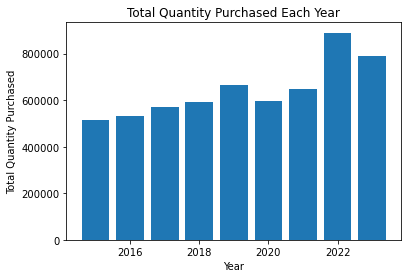

In [156]:
# Plotting the histogram
plt.bar(result['Year'], result['CANTIDADCOMPRA'])
plt.xlabel('Year')
plt.ylabel('Total Quantity Purchased')
plt.title('Total Quantity Purchased Each Year')
plt.show()

In [157]:
# Filter rows where 'TGL' is 'ALMACENABLE'
almacenable_df = df[df['TGL'] == 'ALMACENABLE']

# Get products that are only associated with 'ALMACENABLE'
products_almacenable_only = almacenable_df[~almacenable_df['CODIGO'].isin(df[df['TGL'] == 'TRANSITO']['PRODUCTO'])]['CODIGO'].unique()

# Print the result
print(products_almacenable_only)

['B41691' 'E65007' 'E64911' 'E65509' 'E65894' 'E66071' 'E64663' 'E65056'
 'E70130' 'E64946' 'E64764' 'E64765' 'E64932' 'E64983' 'E69682' 'E99807'
 'E64544' 'E85758' 'E64940' 'E73753' 'E65159' 'E65485' 'E64751' 'E65201'
 'E65486' 'E64488' 'E85769' 'C26183' 'E64750' 'E67835' 'C56207']


In [158]:
# Filter rows where 'TGL' is 'TRANSITO'
transito_df = df[df['TGL'] == 'TRANSITO']

# Get products that are only associated with 'TRANSITO'
products_transito_only = transito_df[~transito_df['CODIGO'].isin(df[df['TGL'] == 'ALMACENABLE']['PRODUCTO'])]['CODIGO'].unique()

# Print the result
print(products_transito_only)

['E99808' 'E64543' 'E64898' 'E64761' 'E78950' 'B40558' 'F43580' 'F50071'
 'F43325' 'F44200' 'F43581' 'F43585' 'F42922' 'F46846' 'F46843' 'F43331']


In [159]:
# Convert lists to sets and check if there are common elements
common_elements = set(products_transito_only).intersection(set(products_almacenable_only))

# Check if there are common elements
if common_elements:
    print(f"There are common elements: {common_elements}")
else:
    print("There are no common elements.")

There are no common elements.


In [160]:
# Get the unique elements by its CODIGO
unique_codigos = df['CODIGO'].unique()
print(len(unique_codigos))

48


In [161]:
# Sum corresponding elements from the three lists
len_list1 = len(products_transito_only)
len_list2 = len(products_almacenable_only)
len_list3 = len(common_elements)

# Print the result
print(len_list1)
print(len_list2)
print(len_list3)

16
31
0


Cada quant temps es demanen els almacenables?

In [187]:
df['id_hospital'] = df['ORIGEN'].apply(lambda x: x.split('-')[1] if x.split('-')[0] == '0' else '20')
df['id_department'] = df['ORIGEN'].apply(lambda x: x.split('-')[2] if '-' in x else '')
df['total_units'] = df['CANTIDADCOMPRA'] * df['UNIDADESCONSUMOCONTENIDAS']

In [188]:
df.head()

,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO,Year,FirstNumber,id_hospital,total_units,DaysBetweenOrders,id_department
409,B41691,2015-01-02,1292/15,400403,100,10,102.803729,1028.03729,Compra menor,0-0-2,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...,2015,0,0,1000,NaN,2
13490,B41691,2015-03-27,235708/15,400403,100,10,102.803729,1028.03729,Compra menor,0-0-2,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...,2015,0,0,1000,84.0,2
14046,B41691,2015-05-28,434566/15,400403,100,10,102.803729,1028.03729,Compra menor,0-0-2,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...,2015,0,0,1000,62.0,2
6326,B41691,2015-07-13,631847/15,400403,100,10,102.803729,1028.03729,Compra menor,0-0-2,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...,2015,0,0,1000,46.0,2
8042,B41691,2015-09-16,745445/15,400403,100,10,102.803729,1028.03729,Compra menor,0-0-2,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...,2015,0,0,1000,65.0,2


In [164]:
# Sort DataFrame by 'CODIGO' and 'FECHAPEDIDO'
df.sort_values(['CODIGO', 'FECHAPEDIDO'], inplace=True)

# Calculate the difference in days between consecutive 'FECHAPEDIDO' for each 'CODIGO'
df['DaysBetweenOrders'] = df.groupby('CODIGO')['FECHAPEDIDO'].diff().dt.days

# Calculate the average number of days between orders for each 'CODIGO'
caducidad_estimada = df.groupby('CODIGO')['DaysBetweenOrders'].mean().reset_index(name='CaducidadAllHospitals')

# Print the result
print(caducidad_estimada)

    CODIGO  CaducidadAllHospitals
0   B40558               5.246654
1   B41691               3.489177
2   C26183              64.224490
3   C56207              71.813953
4   E64488              10.632450
5   E64543               3.482124
6   E64544               7.045673
7   E64663               4.255291
8   E64750               9.411765
9   E64751               6.346457
10  E64761              18.365079
11  E64764               7.793689
12  E64765              11.131488
13  E64898              18.339450
14  E64911               7.323256
15  E64932               5.476923
16  E64940              21.722973
17  E64946               8.270619
18  E64983               5.380872
19  E65007              13.647826
20  E65056               5.088748
21  E65159              11.881481
22  E65201              39.530864
23  E65485              10.193651
24  E65486              13.242798
25  E65509              10.331169
26  E65894              12.350000
27  E66071               3.594203
28  E67462    

In [186]:
# Caducitat per cada hospital
df['id_hospital'].unique()

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [167]:
# Convert 'FECHAPEDIDO' to datetime
df['FECHAPEDIDO'] = pd.to_datetime(df['FECHAPEDIDO'], format='%d/%m/%y')

# Sort DataFrame by 'id_hospital', 'CODIGO', and 'FECHAPEDIDO'
df.sort_values(['id_hospital', 'CODIGO', 'FECHAPEDIDO'], inplace=True)

# Calculate the difference in days between consecutive 'FECHAPEDIDO' for each 'id_hospital' and 'CODIGO'
df['DaysBetweenOrders'] = df.groupby(['id_hospital', 'CODIGO'])['FECHAPEDIDO'].diff().dt.days

# Calculate the mean of 'DaysBetweenOrders' for each 'CODIGO' and each 'id_hospital'
average_days_per_order_per_hospital = df.groupby(['id_hospital', 'CODIGO'])['DaysBetweenOrders'].mean().reset_index(name='AverageDaysPerOrderPerHospital')

# Print the result
print(average_days_per_order_per_hospital)

    id_hospital  CODIGO  AverageDaysPerOrderPerHospital
0             0  B41691                       19.827160
1             0  C26183                      634.333333
2             0  C56207                      459.333333
3             0  E64488                       28.196429
4             0  E64544                       21.475806
..          ...     ...                             ...
306           9  F43580                       16.000000
307           9  F44200                      107.833333
308           9  F46843                       35.000000
309           9  F46846                             NaN
310           9  F50071                      127.200000

[311 rows x 3 columns]


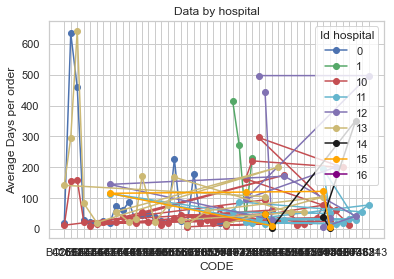

In [184]:
grouped_df=average_days_per_order_per_hospital.copy()

python_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']
# Connect the dots
for id_hospital, color in zip(grouped_df['id_hospital'].unique(), python_colors):
    hospital_data = grouped_df[grouped_df['id_hospital'] == id_hospital]
    plt.plot(hospital_data['CODIGO'], hospital_data['AverageDaysPerOrderPerHospital'], marker='o', linestyle='-', color=color, label=str(id_hospital))


plt.title(f'Data by hospital')
plt.xlabel('CODE')
plt.ylabel('Average Days per order')
plt.legend(title='Id hospital', loc='upper right')
plt.show()
